In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.)


In [3]:
# Read in as dataframe
titanic = pd.read_csv("resources/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Get features
age = titanic.loc[:, "Age"]
fare = titanic.loc[:, "Fare"]

In [4]:
age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [5]:
fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

## Boxplot

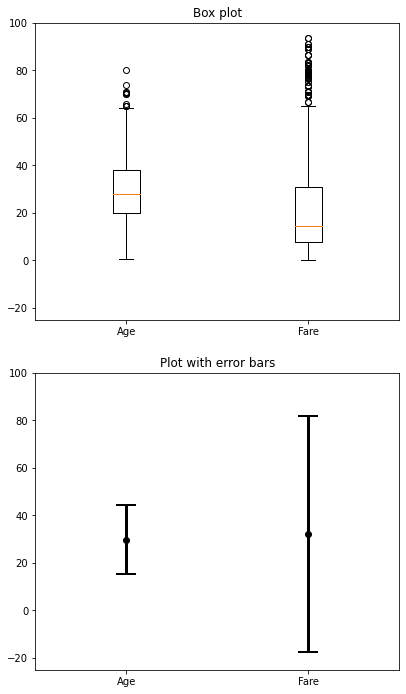

In [6]:
age.dropna(inplace=True)
fare.dropna(inplace=True)

fig, ax = plt.subplots(figsize=(6,10), nrows=2)

ax[0].boxplot([age,fare])
ax[0].set_xticks([1,2])
ax[0].set_xticklabels(["Age","Fare"])
ax[0].set_xlim(0.5,2.5)
ax[0].set_ylim(-25,100)
ax[0].set_title("Box plot")


ax[1].errorbar(x=[1,2], y=[age.mean(),fare.mean()],
               yerr=[age.std(),fare.std()],
               capsize=10, capthick=2, 
               linewidth=0, elinewidth=3, marker="o", color="black" )
ax[1].set_xticks([1,2])
ax[1].set_xticklabels(["Age","Fare"])
ax[1].set_xlim(0.5,2.5)
ax[1].set_ylim(-25,100)
ax[1].set_title("Plot with error bars")
plt.tight_layout(pad=2)

plt.show()

### Warum sind die Whisker im Boxplot bei Fare unterschiedlich lang?
Die Whisker sind in nem Abstand von 1,5 * IQR angeordnet. Der obere ist das Maximum, der untere das Minimum. Wenn man das nun ausrechnen würde, dann würde man beim unteren IQR auf einen negativen Wert kommen. Das macht aber in diesem Kontext keinen Sinn, gerade weil es keine Fare < 0 gibt, also wird das Minimum entsprechend "früher" gezeichnet.

# 2.)

## Violin plot

Text(0.5, 1.0, 'Fare')

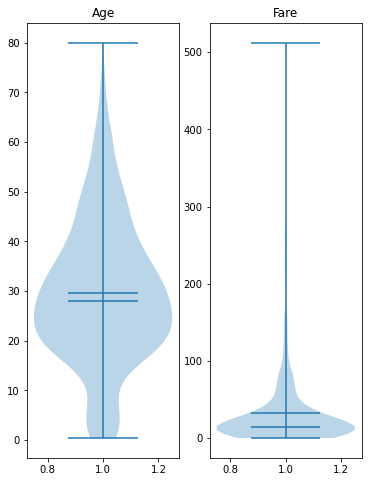

In [7]:
fix, ax = plt.subplots(ncols=2, figsize=(6,8))
ax[0].violinplot(age, showmeans=True, showextrema=True, showmedians=True)
ax[0].set_title("Age")
ax[1].violinplot(fare, showmeans=True, showextrema=True, showmedians=True)
ax[1].set_title("Fare")


## Strip plot

<AxesSubplot:title={'center':'Fare'}, xlabel='Fare'>

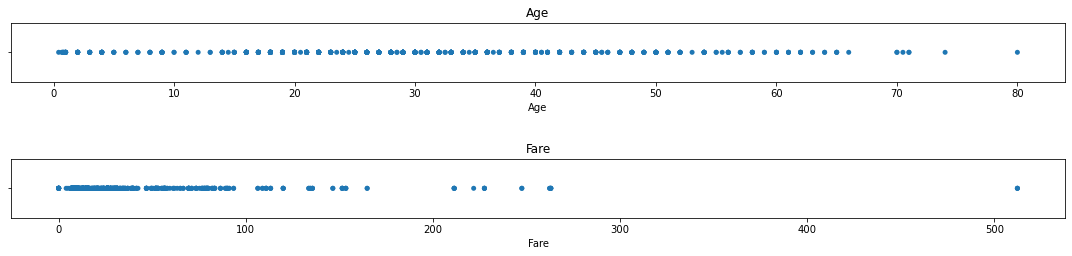

In [8]:
fig, ax = plt.subplots(nrows=2, figsize=(16,4))
ax[0].set_title("Age")
sns.stripplot(x=age, jitter=False, ax=ax[0])

ax[1].set_title("Fare")
plt.tight_layout(pad=3)
sns.stripplot(x=fare, jitter=False, ax=ax[1])

# Jitter plot 

<AxesSubplot:title={'center':'Fare'}, xlabel='Fare'>

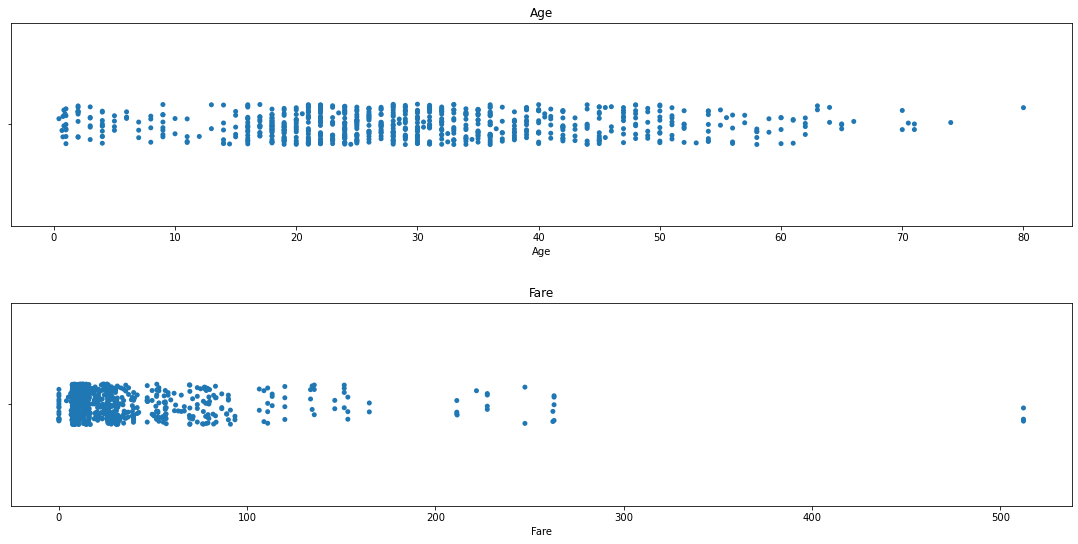

In [9]:
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
ax[0].set_title("Age")
sns.stripplot(x=age, jitter=True, ax=ax[0])

ax[1].set_title("Fare")
plt.tight_layout(pad=3)
sns.stripplot(x=fare, jitter=True, ax=ax[1])

# 3.)

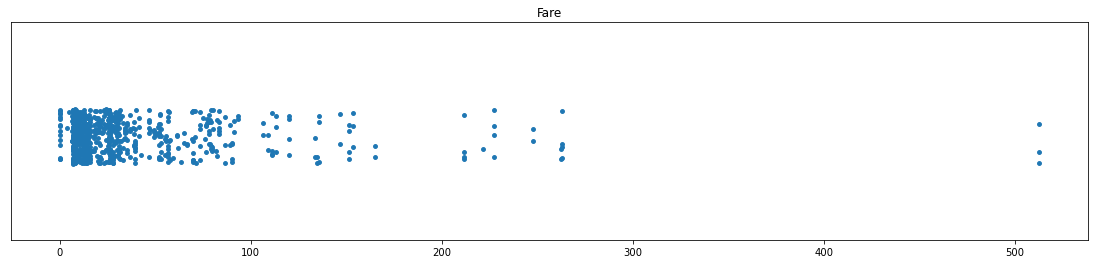

In [10]:
fig, ax = plt.subplots(figsize=(19.3,4))

# Take some value for y-axis near center.
yv = np.array([2.5 for i in range(len(fare))])

# Add some random jitter.
jittered_yv = yv + 1 * np.random.rand(len(yv)) - 0.1

# Plot
ax.set_title("Fare")
ax.get_yaxis().set_visible(False)
ax.set_ylim([1, 5])
ax.scatter(fare, jittered_yv, s=15)

0.0